In [1]:
from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import time
import pandas as pd
import requests
import numpy as np
import math
from tqdm import tqdm

## 네이버 금융 기업 실적 분석(연간, 분기)

In [2]:
def annual_finance(code):
    URL = "https://finance.naver.com/item/main.nhn?code=" + code
    company = requests.get(URL)
    html = company.text
    df = pd.read_html(company.text)[3]
    df.set_index(('주요재무정보', '주요재무정보', '주요재무정보'), inplace=True)
    df.index.rename('주요재무정보', inplace=True)
    df.columns = df.columns.droplevel(2)
    annual_finance = pd.DataFrame(df).xs('최근 연간 실적', axis=1) 
    return annual_finance

def quarter_finance(code):
    URL = "https://finance.naver.com/item/main.nhn?code=" + code
    company = requests.get(URL)
    html = company.text
    df = pd.read_html(company.text)[3]
    df.set_index(('주요재무정보', '주요재무정보', '주요재무정보'), inplace=True)
    df.index.rename('주요재무정보', inplace=True)
    df.columns = df.columns.droplevel(2)
    quarter_finance = pd.DataFrame(df).xs('최근 분기 실적', axis=1)
    return quarter_finance

In [4]:
annual_finance("005930") # 연간

,2018.12,2019.12,2020.12,2021.12(E)
주요재무정보,,,,
매출액,2437714.00,2304009.00,2368070.00,2751440.00
영업이익,588867.00,277685.00,359939.00,530513.00
당기순이익,443449.00,217389.00,264078.00,401641.00
영업이익률,24.16,12.05,15.20,19.28
순이익률,18.19,9.44,11.15,14.60
ROE(지배주주),19.63,8.69,9.98,14.13
부채비율,36.97,34.12,37.07,NaN
당좌비율,204.12,233.57,214.82,NaN
유보율,27531.92,28856.02,30692.79,NaN


In [5]:
quarter_finance("005930") # 분기

,2020.06,2020.09,2020.12,2021.03,2021.06,2021.09(E)
주요재무정보,,,,,,
매출액,529661.00,669642.00,615515.00,653885.00,636716.00,721896.00
영업이익,81463.00,123532.00,90470.00,93829.00,125667.00,154150.00
당기순이익,55551.00,93607.00,66071.00,71417.00,96345.00,117766.00
영업이익률,15.38,18.45,14.70,14.35,19.74,21.35
순이익률,10.49,13.98,10.73,10.92,15.13,16.31
ROE(지배주주),8.49,9.51,9.98,10.79,12.04,NaN
부채비율,32.67,36.09,37.07,43.23,36.29,NaN
당좌비율,250.04,229.69,214.82,192.26,214.08,NaN
유보율,29477.97,30242.29,30692.79,30135.47,31140.36,NaN


## 동종업종 비교 --- 동종업종 몇개만 네이버에서 보여줌

In [3]:
code = '005930'
URL = "https://finance.naver.com/item/main.nhn?code=" + code

company = requests.get(URL)
html = company.text

df = pd.read_html(company.text)[4]
df

,종목명,삼성전자*005930,SK하이닉스*000660,리노공업058470,DB하이텍*000990,원익IPS*240810
0,현재가,75700,103500,171100,58800,45000
1,전일대비,상향 100,"하향 1,500","하향 5,200",하향 200,상향 200
2,등락률,상향 +0.13%,하향 -1.43%,하향 -2.95%,하향 -0.34%,상향 +0.45%
3,시가총액(억),4519125,753482,26079,26106,22087
4,외국인비율(%),51.70,46.13,48.73,17.14,23.06
5,매출액(억),636716,103217,789,2747,4325
6,영업이익(억),125667,26946,344,814,1007
7,조정영업이익(억),125667,26946,344,814,1007
8,영업이익증가율(%),33.93,103.45,23.34,34.33,315.37
9,당기순이익(억),96345,19884,294,590,760


# 투자정보

In [4]:
def Investment_infor(code):
    URL = "https://finance.naver.com/item/main.nhn?code=" + code
    company = requests.get(URL)
    html = company.text
    df5 = pd.read_html(company.text)[5]
    df6 = pd.read_html(company.text)[6]
    df7 = pd.read_html(company.text)[7]
    df8 = pd.read_html(company.text)[8]
    df9 = pd.read_html(company.text)[9]
    df = pd.concat([df5,df6,df7,df8,df9])
    df.columns = ['투자정보', code] # code 대신 종목이름이 들어가야됨
    df.set_index('투자정보', inplace = True)
    return df

Investment_infor("005930")

,005930
투자정보,
시가총액,"451조 9,125 억원"
시가총액순위,코스피 1위
상장주식수,5969782550
액면가l매매단위,100원 l 1주
외국인한도주식수(A),5969782550
외국인보유주식수(B),3086546459
외국인소진율(B/A),51.70%
투자의견l목표주가,"3.95매수 l 101,238"
52주최고l최저,"96,800 l 54,000"


## 재무제표 연간 ( 네이버 Financial Summary)

In [5]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt

In [6]:
def stock_crawler(code):
    driver  = Chrome()
    driver.maximize_window()
    base_url = 'https://finance.naver.com/item/coinfo.nhn?code='+ code + '&target=finsum_more'
    driver.get(base_url)
    #frmae구조 안에 필요한 데이터가 있기 때문에 해당 데이터를 수집하기 위해서는 frame구조에 들어가야한다.
    driver.switch_to_frame(driver.find_element_by_id('coinfo_cp'))
    
    #재무제표 "연간" 클릭하기
    driver.find_elements_by_xpath('//*[@class="schtab"][1]/tbody/tr/td[3]')[0].click()

    html0 = driver.page_source
    html1 = BeautifulSoup(html0,'html.parser')
    
    #기업명 뽑기
    title0 = html1.find('head').find('title').text
    print(title0.split('-')[-1])
    
    html22 = html1.find('table',{'class':'gHead01 all-width','summary':'주요재무정보를 제공합니다.'})
    
    #date scrapy
    thead0 = html22.find('thead')
    tr0 = thead0.find_all('tr')[1]
    th0 = tr0.find_all('th')
    
    date = []
    for i in range(len(th0)):
        date.append(''.join(re.findall('[0-9/]',th0[i].text)))
    
    #columns scrapy
    tbody0 = html22.find('tbody')
    tr0 = tbody0.find_all('tr')
    
    col = []
    for i in range(len(tr0)):

        if '\xa0' in tr0[i].find('th').text:
            tx = re.sub('\xa0','',tr0[i].find('th').text)
        else:
            tx = tr0[i].find('th').text

        col.append(tx)
    
    #main text scrapy
    td = []
    for i in range(len(tr0)):
        td0 = tr0[i].find_all('td')
        td1 = []
        for j in range(len(td0)):
            if td0[j].text == '':
                td1.append('0')
            else:
                td1.append(td0[j].text)

        td.append(td1)
    
    td2 = list(map(list,zip(*td)))
    driver.close() 
    result = pd.DataFrame(td2,columns = col,index = date).T
    return result

In [7]:
samsung = stock_crawler("005930")
samsung

C:\Users\SM2119\anaconda3\envs\deep01\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use driver.switch_to.frame instead
  import sys


 기업개요(삼성전자)


,2018/12,2019/12,2020/12,2021/12,2020/12,2021/03,2021/06,2021/09
매출액,"2,437,714","2,304,009","2,368,070","2,751,440","615,515","653,885","636,716","721,896"
영업이익,"588,867","277,685","359,939","530,513","90,470","93,829","125,667","154,150"
영업이익(발표기준),"588,867","277,685","359,939",0,"90,470","93,829","125,667",0
세전계속사업이익,"611,600","304,322","363,451","544,709","89,745","97,506","128,824","156,608"
당기순이익,"443,449","217,389","264,078","401,641","66,071","71,417","96,345","117,766"
당기순이익(지배),"438,909","215,051","260,908","392,295","64,455","70,928","94,507","111,670"
당기순이익(비지배),"4,540","2,338","3,170",0,"1,617",489,"1,838",0
자산총계,"3,393,572","3,525,645","3,782,357","4,091,158","3,782,357","3,928,263","3,847,777",0
부채총계,"916,041","896,841","1,022,877","1,123,269","1,022,877","1,185,577","1,024,534",0
자본총계,"2,477,532","2,628,804","2,759,480","2,967,890","2,759,480","2,742,686","2,823,243",0


# 영업이익증가율

In [8]:
rate_2019 = float(samsung.loc['영업이익률', '2019/12'])
rate_2018 = float(samsung.loc['영업이익률', '2018/12'])
rate = (rate_2019- rate_2018) / rate_2018 *100
rate # 영업이익증가율

-50.12417218543046

## 네이버 금융 손익계산서

In [9]:
def IncomeStatement(code): # 손익계산서
    driver  = Chrome()
    base_url = 'https://finance.naver.com/item/coinfo.nhn?code='+ code
    driver.get(base_url)
    #frame구조에 들어가기
    driver.switch_to_frame(driver.find_element_by_id('coinfo_cp'))
    # 재무분석 클릭
    driver.find_elements_by_xpath('//*[@id="header-menu"]/div[1]/dl/dt[3]/a')[0].click()
    # 포괄손익계산서 클릭
    driver.find_elements_by_xpath('//*[@id="rpt_tab1"]')[0].click()

    time.sleep(1)
    html1 = BeautifulSoup(driver.page_source,'lxml') #지금 현 상태의 page source불러오기

    # 손익계산서 영역 불러오기
    html2 = html1.find('table',{'class':"gHead01 all-width data-list",'summary':"IFRS연결 연간 재무 정보를 제공합니다."})

    # 손익계산서에서 날짜부분 불러오기
    thead0 = html2.find('thead') # 날짜는 thead 안에 tr안에 th 순서로 들어있다.
    tr0 = thead0.find_all('tr')[0]
    th0 = tr0.find_all('th')

    #날짜부분만 따로 저장
    header = []
    for i in range(len(th0)):
        # re.sub(pattern, repl, string, count)메서드는 
        # 원래 문자열에서 정규식 pattern을 repl값으로 대체 한 후 새 문자열을 반환합니다. 
        header.append(re.sub("\n|\t|연간컨센서스보기|연간컨센서스닫기", "",th0[i].text))
    header = header[1:]
    # 항목의 내용 이름만 저장 => 데이터프레임의 인덱스로 사용
    index = []
    for i in range(len(html2.select("tbody > tr.lvl1 > td.txt"))):
        title = html2.select("tbody > tr.lvl1 > td.txt")[i].text
        index.append(re.sub("펼치기|\n|\t|\xa0", "",title))

    # 내용만 저장
    main = [[""]*8 for i in range(len(html2.select("tbody > tr.lvl1 > td.ext1")))]

    for num in range(0, 8): # 0부터7까지
        for i in range(len(html2.select("tbody > tr.lvl1 > td.ext"+str(num)))):
            con = html2.select("tbody > tr.lvl1 > td.ext"+str(num))[i].text
            if con == '\xa0':
                con = "NaN"
            main[i][num] = con

    main_df = pd.DataFrame(main, columns = header, index = index)
    driver.close()
    return main_df

In [13]:
pd.set_option('display.max_rows', None)
IncomeStatement("005930") # 포괄 손익계산서

C:\Users\SM2119\anaconda3\envs\deep01\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: use driver.switch_to.frame instead
  


,2016/12(IFRS연결),2017/12(IFRS연결),2018/12(IFRS연결),2019/12(IFRS연결),2020/12(IFRS연결),2021/12(E)(IFRS연결),전년대비(YoY),전년대비(YoY)
매출액(수익),"2,018,667.5","2,395,753.8","2,437,714.2","2,304,008.8","2,368,069.9","2,751,439.6",2.8,16.2
*내수,NaN,NaN,NaN,"2,304,009.0","2,368,070.0",NaN,2.8,NaN
*수출,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
매출원가,"1,202,777.2","1,292,906.6","1,323,944.1","1,472,395.5","1,444,883.0",NaN,-1.9,NaN
매출총이익,"815,890.3","1,102,847.2","1,113,770.0","831,613.3","923,186.9","1,132,238.1",11.0,22.6
판매비와관리비,"523,483.6","566,396.8","524,903.4","553,928.2","563,248.2",NaN,1.7,NaN
영업이익,"292,406.7","536,450.4","588,866.7","277,685.1","359,938.8","530,512.6",29.6,47.4
*기타영업손익,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
영업이익(발표기준),"292,406.7","536,450.4","588,866.7","277,685.1","359,938.8",NaN,29.6,NaN
*[구K-IFRS]영업이익,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 네이버 금융 재무 상태표

In [14]:
from selenium.webdriver.chrome.options import Options

chroem_options = Options()
# chroem_options.add_argument('--headless')
chroem_options.add_argument('disable-gpu')
chroem_options.add_argument('cookie=NNB=L332ALUDS7IWA; _ga=GA1.2.1922076699.1625215709; ASID=d269e02e0000017a9975a9220000004c; m_loc=6389688ba29017dbca9b47bdd9491664b445e9a5dfd2518f5b102f586eafb607; NFS=2; summary_item_type=recent; naver_stock_codeList=005930%7C052900%7C018620%7C; nx_ssl=2; JSESSIONID=3DED70157B51D7AF05DF32CFB60CFB17')
chroem_options.add_argument('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36')

____________

In [10]:
def BalanceSheet(code): # 재무상태표
    driver  = Chrome()
#     driver.maximize_window()
    base_url = 'https://finance.naver.com/item/coinfo.nhn?code='+ code
    driver.get(base_url)
    #frame구조에 들어가기
    driver.switch_to_frame(driver.find_element_by_id('coinfo_cp'))
    # 재무분석 클릭
    driver.find_elements_by_xpath('//*[@id="header-menu"]/div[1]/dl/dt[3]/a')[0].click()
    # 재무 상태표 클릭
    driver.find_elements_by_xpath('//*[@id="rpt_tab2"]')[0].click()
    time.sleep(1)
    html1 = BeautifulSoup(driver.page_source,'lxml') #지금 현 상태의 page source불러오기

    # 재무상태표 영역 불러오기
    html2 = html1.find('table',{'class':"gHead01 all-width data-list",'summary':"IFRS연결 연간 재무 정보를 제공합니다."})
    time.sleep(1)
    # 재무상태표에서 날짜부분 불러오기
    thead0 = html2.find('thead') # 날짜는 thead 안에 tr안에 th 순서로 들어있다.
    tr0 = thead0.find_all('tr')[0]
    th0 = tr0.find_all('th')

    #날짜부분만 따로 저장
    header = []
    for i in range(len(th0)):
        # re.sub(pattern, repl, string, count)메서드는 
        # 원래 문자열에서 정규식 pattern을 repl값으로 대체 한 후 새 문자열을 반환한다. 
        header.append(re.sub("\n|\t|연간컨센서스보기|연간컨센서스닫기", "",th0[i].text))
    header = header[1:]
    # 항목의 내용 이름만 저장 => 데이터프레임의 인덱스로 사용
    index = []
    for i in range(len(html2.select("tbody > tr:not(.lvl4, .lvl5) > td.txt"))):
        title = html2.select("tbody > tr:not(.lvl4, .lvl5) > td.txt")[i].text
        index.append(re.sub("펼치기|\n|\t|\xa0", "",title))

    # 내용만 저장
    main = [[""]*8 for i in range(len(html2.select("tbody > tr:not(.lvl4, .lvl5) > td.ext1")))]

    for num in range(0, 8): # 0부터7까지
        for i in range(len(html2.select("tbody > tr:not(.lvl4, .lvl5) > td.ext"+str(num)))):
            con = html2.select("tbody > tr:not(.lvl4, .lvl5) > td.ext"+str(num))[i].text
            if con == '\xa0':
                con = "NaN"
            main[i][num] = con

    main_df = pd.DataFrame(main, columns = header, index = index)
    driver.close()
    return main_df

In [18]:
# pd.set_option('display.max_rows', None)
BalanceSheet("005930") # 재무상태표

C:\Users\SM2119\anaconda3\envs\deep01\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use driver.switch_to.frame instead
  import sys


,2016/12(IFRS연결),2017/12(IFRS연결),2018/12(IFRS연결),2019/12(IFRS연결),2020/12(IFRS연결),2021/12(E)(IFRS연결),전년대비(YoY),전년대비(YoY)
자산총계,"2,621,743.2","3,017,520.9","3,393,572.4","3,525,645.0","3,782,357.2","4,091,158.3",7.3,8.2
유동자산,"1,414,297.0","1,469,824.6","1,746,974.2","1,813,852.6","1,982,155.8","2,155,288.6",9.3,8.7
재고자산,"183,535.0","249,833.6","289,847.0","267,664.6","320,431.5",NaN,19.7,NaN
유동생물자산,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
당기손익-공정가치측정금융자산,NaN,NaN,"20,019.5","17,274.4",714.5,NaN,-95.9,NaN
기타포괄손익-공정가치측정금융자산,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
상각후원가측정유가증권,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
상각후원가측정금융자산,NaN,NaN,"27,036.9","39,142.2","27,571.1",NaN,-29.6,NaN
단기금융자산,"560,708.7","526,390.7","658,938.0","762,520.5","924,417.0",NaN,21.2,NaN
매출채권및기타채권,"278,004.1","318,049.6","369,484.7","393,104.6","345,696.0",NaN,-12.1,NaN


## 네이버 금융 현금흐름표

In [11]:
def statementCashFlow(code): # 현금흐름표
    driver  = Chrome()
    base_url = 'https://finance.naver.com/item/coinfo.nhn?code='+ code
    driver.get(base_url)
    #frame구조에 들어가기
    driver.switch_to_frame(driver.find_element_by_id('coinfo_cp'))
    # 재무분석 클릭
    driver.find_elements_by_xpath('//*[@id="header-menu"]/div[1]/dl/dt[3]/a')[0].click()
    # 현금흐름표 클릭
    driver.find_elements_by_xpath('//*[@id="rpt_tab3"]')[0].click()
    time.sleep(1)
    html1 = BeautifulSoup(driver.page_source,'lxml') #지금 현 상태의 page source불러오기

    # 현금흐름표 영역 불러오기
    html2 = html1.find('table',{'class':"gHead01 all-width data-list",'summary':"IFRS연결 연간 재무 정보를 제공합니다."})

    # 현금흐름표에서 날짜부분 불러오기
    thead0 = html2.find('thead') # 날짜는 thead 안에 tr안에 th 순서로 들어있다.
    tr0 = thead0.find_all('tr')[0]
    th0 = tr0.find_all('th')

    #날짜부분만 따로 저장
    header = []
    for i in range(len(th0)):
        # re.sub(pattern, repl, string, count)메서드는 
        # 원래 문자열에서 정규식 pattern을 repl값으로 대체 한 후 새 문자열을 반환합니다. 
        header.append(re.sub("\n|\t|연간컨센서스보기|연간컨센서스닫기", "",th0[i].text))
    header = header[1:]
    # 항목의 내용 이름만 저장 => 데이터프레임의 인덱스로 사용
    index = []
    for i in range(len(html2.select("tbody > tr:not(.lvl4, .lvl5) > td.txt"))):
        title = html2.select("tbody > tr:not(.lvl4, .lvl5) > td.txt")[i].text
        index.append(re.sub("펼치기|\n|\t|\xa0", "",title))

    # 내용만 저장
    main = [[""]*8 for i in range(len(html2.select("tbody > tr:not(.lvl4, .lvl5) > td.ext1")))]

    for num in range(0, 8): # 0부터7까지
        for i in range(len(html2.select("tbody > tr:not(.lvl4, .lvl5) > td.ext"+str(num)))):
            con = html2.select("tbody > tr:not(.lvl4, .lvl5) > td.ext"+str(num))[i].text
            if con == '\xa0':
                con = "NaN"
            main[i][num] = con

    main_df = pd.DataFrame(main, columns = header, index = index)
    driver.close()
    return main_df

In [20]:
pd.set_option('display.max_rows', None)
statementCashFlow("005930") # 현금흐름표

C:\Users\SM2119\anaconda3\envs\deep01\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: use driver.switch_to.frame instead
  


,2016/12(IFRS연결),2017/12(IFRS연결),2018/12(IFRS연결),2019/12(IFRS연결),2020/12(IFRS연결),2021/12(E)(IFRS연결),전년대비(YoY),전년대비(YoY)
영업활동으로인한현금흐름,"473,856.4","621,620.4","670,318.6","453,829.2","652,870.1","645,131.0",43.9,-1.2
당기순이익,"227,260.9","421,867.5","443,448.6","217,388.7","264,078.3","392,294.7",21.5,48.5
법인세비용차감전계속사업이익,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
현금유출이없는비용등가산,"367,816.9","413,191.0","484,356.1","424,268.5","461,932.9",NaN,8.9,NaN
현금유입이없는수익등차감,"60,272.1","51,078.7","48,310.4","49,841.7","45,747.4",NaN,-8.2,NaN
영업활동으로인한자산부채변동(운전자본변동),"-11,809.5","-106,205.5","-99,243.7","-25,457.6","1,224.2",NaN,104.8,NaN
*영업에서창출된현금흐름,"522,996.1","677,774.3","780,250.6","566,357.9","681,488.1",NaN,20.3,NaN
이자수입,"14,050.9","15,811.2","17,885.2","23,064.0","22,202.1",NaN,-3.7,NaN
이자지급(-),"-4,438.4","-5,427.2","-5,482.7","-5,799.8","-5,553.2",NaN,4.3,NaN
배당금수입,"2,568.5","1,733.1","2,159.9","2,418.0","2,436.7",NaN,0.8,NaN


# 주가데이터로 KMV모형을 이용해 부도예측

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

![image-3.png](attachment:image-3.png)

연 평균 성장률 : 기업 자산가치 성장률

(T기간) 부도 거리 = (ln(해당시점 자산의 가치/ T시점안에 만료되는 유동부채) + (연평균 성장율 - 기업 연간 자산의 변동성^(2))*T기간) / (기업 연간 자산의 변동성 * 루트T)



![image.png](attachment:image.png)

In [12]:
data = pd.read_csv('./주가 데이터 10년/total.csv', encoding = "cp949")

In [13]:
data.head()

,Unnamed: 0,종목코드,종목명,날짜,종가,증권전산업종코드,발행주식수
0,0.0,A060310,3S,20210813,3520,270,46271000
1,1.0,A060310,3S,20210812,3685,270,46271000
2,2.0,A060310,3S,20210811,3590,270,46271000
3,3.0,A060310,3S,20210810,3675,270,46271000
4,4.0,A060310,3S,20210809,3730,270,46271000


In [15]:
b1 = data.loc[: ,'종목명'] == "롯데케미칼"
b2 = data.loc[: ,'날짜'] == '20201230'
StockCode = data.loc[b1, "종목코드"].unique()[0][1:]
Balance = BalanceSheet(StockCode) # 재무상태표

Price201230 = data.loc[b1 & b2, "종가"] # 20201230의 종가
nois = data.loc[b1 & b2, "발행주식수"]

C:\Users\SM2119\anaconda3\envs\deep01\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use driver.switch_to.frame instead
  import sys


In [16]:
Price = data.loc[b1, "날짜": "종가"]

(T기간) 부도 거리 = (ln(해당시점 자산의 가치/ T시점안에 만료되는 유동부채) + (연평균 성장율 - 기업 연간 자산의 변동성^(2))*T기간) / (기업 연간 자산의 변동성 * 루트T)

- T는 분석자의 위험분석기간으로 신용위험의 경우 보통 1년을 사용함

부도 거리를 구하기 위해서는 자산의 가치와 자산가치의 변동성을 추정해야 한다.
 
이는 다음 아래의 두식을 연속 치환하여 구할수 있다.

![image.png](attachment:image.png)

http://www.korfin.org/korfin_file/forum/17fall5-2.pdf

- 필요한 데이터 
1. 유동부채 = T시점에 만료되는 부채의 장부가치(B)
2. 자기자본의 시장가치 = 시가총액(주가 * 발행주식수)(E)
3. 무위험 이자율(R)
    - 기간이 1년이니까 1년 국고채를 사용해야됨     
      2016  |  2017 |  2018  |  2019  |  2020
      
       ? | ?  | ?  |  ? |	0.61 => 일단 대충적음
     
4. 분석기간 = 1년(T)
5. 자시자본가치의 변동성(시그마E) -- 1.역사적 변동성 2.내재변동성(VKOSPI) 둘중 선택
6. 연평균 성장율 = 기업 자산가치 성장률(뮤)

- 추론할 데이터
1. 해당시점 자산의 가치 = 자산의 시장가치(A)
2. 기업 연간 자산의 변동성 = 자산가치의 변동성(시그마A)


![image.png](attachment:image.png)

http://163.239.1.207:8088/dl_image/IMG/03//000000012333/SERVICE/000000012333_01.PDF

file:///C:/Users/SM2119/Downloads/KCI_FI001155973.pdf
 
https://partloan.tistory.com/73
 
여신금리
 
https://www.standardchartered.co.kr/np/kr/pl/et/StandardInterestRateP.jsp

#### 가정: 2020년도의 채무불이행 확률( 부도거리를 이용한 부도확률)을 구해보자

In [17]:
B = Balance.loc['유동부채', '2020/12(IFRS연결)'] # 단기부채
B = re.sub(",","",B)
B = float(B)
totalB = Balance.loc['부채총계', '2020/12(IFRS연결)'] # 총부채
totalB = re.sub(",","",totalB)
totalB = float(totalB)
LTD = totalB - B # 장기부채

r = 0.61 # 무위험 이자율
T = 1 # 분석기간
E = int(Price201230) * int(nois) # 자기자본의 시장가치 = 시가총액(주가 * 발행주식수)
E = E/100000000 # 재무재표가 억단위라서 1억으로 나눔
# A = ? # 자산의 시장가치
# sigmaA = ? # 자산가치의 변동성
# sigmaE =  # 자기자본가치의 변동성 = 내재변동성(VIX)과 역사적 변동성으로 구할수있다

In [18]:
lnrate = []
for i in range(len(Price)-1):
    rage = math.log(int(Price.iloc[i, 1])/ int(Price.iloc[i+1, 1])) # 주가의 변화비율에 ln
    lnrate.append(rage)
    
# str1 = []
# for i in range(len(lnrate)):
#     str1.append(lnrate[i] - np.mean(lnrate)) # 평균과의 차이
sigmaE = (np.var(lnrate) * 252) ** 1/2 # 역사적 변동성

# sigmaE = 22.09/100 # 내재 변동성 (VKOSPI지수)

# 해찾기 풀이

In [19]:
import math
from tqdm import tqdm

In [693]:
# E = float(E)

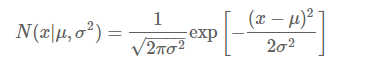

In [20]:
import scipy.stats as stats

# def N(x) -> float: # 정규분포 
#     return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

def d1(A, sigmaA) -> float:
    return (math.log(A/B)+(r+sigmaA ** 2/2)*T)/(sigmaA * math.sqrt(T))

def d2(A, sigmaA) -> float:
    return d1(A, sigmaA) - sigmaA * math.sqrt(T)
    
def Ve(A, sigmaA) -> float:
    return A * stats.norm.cdf(d1(A, sigmaA)) - np.exp(-r * T) * B * stats.norm.cdf(d2(A, sigmaA))
    
def sigmaE2(A, sigmaA) -> float:
    return (A/E) * stats.norm.cdf(d1(A, sigmaA)) * sigmaA

In [21]:
print(f"유동부채:{B}, 장기부채:{LTD}, 시장가치E: {E}, 자기자본의 변동성 sigmaE:{sigmaE}")

유동부채:28676.9, 장기부채:28065.0, 시장가치E: 94599.0, 자기자본의 변동성 sigmaE:0.07931512225360048


In [23]:
sigmaE

0.07931512225360048

In [24]:
E

94599.0

In [25]:
sigmaE - sigmaE2(E,sigmaE)

0.0

In [26]:
E - Ve(E, sigmaE)

15581.61853736252

sigmaE = sigmaE2(sigmaA) 와 E = Ve(sigmaA)를 만족하는 A, sigmaA를 구해야한다

In [27]:
# error1 = sigmaE
# error2 = E
# A = 0
# sigmaA = 0
# # result1 = []
# # result2 = []
# breakr = False
# E = int(E)
# for A1 in tqdm(range(E - 3000, E + 10000)):
#     A1 = A1/100
#     for sigmaA1 in range(1, 100):
#         sigmaA1 = sigmaA1 / 100
#         if abs(sigmaE - sigmaE2(A1, sigmaA1)) < error1 or abs(E-Ve(A1, sigmaA1)) < error2:
#             error1 = abs(sigmaE - sigmaE2(A1, sigmaA1)) # 오차
#             error2 = abs(E-Ve(A1, sigmaA1)) # 오차
#             A = A1
#             sigmaA = sigmaA1
# #             result1.append(sigmaA1)
# #             result2.append(A1)
#             if error1 < 0.001 and error2 < 0.001:
#                 breakr = True
#                 break
#     if breakr == True:
#         break
# print(f"A:{A}, sigmA:{sigmaA}, error1:{error1}, error2:{error2},sigmaE 근사값:{sigmaE - error1},E근사값:{E - error2}") 

In [28]:
error1 = sigmaE
error2 = E
A = 0
sigmaA = 0
breakr = False
E = int(E)
for A1 in tqdm(range(E - 1000, E + 2000)):
    for sigmaA1 in range(1, 100):
        sigmaA1 = sigmaA1 / 100
        if abs(sigmaE - sigmaE2(A1, sigmaA1)) < error1:
            if  abs(E-Ve(A1, sigmaA1)) < error2:
                error1 = abs(sigmaE - sigmaE2(A1, sigmaA1)) # 오차
                error2 = abs(E-Ve(A1, sigmaA1)) # 오차
                A = A1
                sigmaA = sigmaA1
                if error1 < 0.001 and error2 < 1:
                    breakr = True
                    break
    if breakr == True:
        break
print(f"A:{A}, sigmA:{sigmaA}, error1:{error1}, error2:{error2},sigmaE 근사값:{sigmaE - error1},E근사값:{E - error2}") 

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:28<00:00, 104.96it/s]

A:96598, sigmA:0.01, error1:0.06910380923760664, error2:13582.61853736252,sigmaE 근사값:0.010211313015993831,E근사값:81016.38146263748


In [29]:
print(A, sigmaA)

96598 0.01


In [30]:
print(f"error1:{error1},sigmaE 근사값:{sigmaE - error1}")

error1:0.06910380923760664,sigmaE 근사값:0.010211313015993831


In [31]:
print(f"error2:{error2}, E 근사값:{E - error2}")

error2:13582.61853736252, E 근사값:81016.38146263748


In [32]:
sigmaE - sigmaE2(A, sigmaA)

0.06910380923760664

In [33]:
print(sigmaE, sigmaE2(A, sigmaA))

0.07931512225360048 0.010211313015993826


In [34]:
E - Ve(A, sigmaA)

13582.61853736252

In [35]:
print(E, Ve(A, sigmaA))

94599 81016.38146263748


부도거리 구하기

자산의 기대수익률 내용은 다음 논문의 19페이지

file:///C:/Users/SM2119/Downloads/OA2014_E2_0037.pdf

-----------
부도거리, 예상부도확률에 대한 내용은 다음 논문의 6페이지
https://www.koreascience.or.kr/article/JAKO201411560018290.pdf

In [36]:
DP = B + 0.5*LTD # 부도점
# 2020년도 명목 GDP: 1,933.2조원 / 2019년도 명목 GDP:1924.5조원
# 명목 경제성장률 = (2020년도 명목 GDP - 2019년도 명목 GDP)/2020년도 명목 GDP * 100
mu = ((1933.2-1924.5)/1933.2) * 100 # 자산의 기대수익률 (자산 수익률의 평균=해당연도의 명목 경제성장률로 계산)
DD = (math.log(A/DP) + (mu - (sigmaA**2)/2)*T) / (sigmaA*math.sqrt(T)) # 부도거리
DD

126.61200371711793

In [37]:
# 예상 부도확률
stats.norm.cdf(-DD)

0.0

In [38]:
# d2(result2[len(result2)-1], result1[len(result1)-1]) # 어떤 논문에서는 부도거리와 d2값이 동일하다고 나옴(mu에 r을 대입하면 그럼)
d2(A, sigmaA)

182.44161164418497

In [39]:
# 예상 부도확률
dd = d2(A, sigmaA)
stats.norm.cdf(-dd)

0.0

부도거리란
- 만기시점에 자산의 기대가격이 부도점에서 얼마나 멀리 떨어져 있는지를 나타내는 지표
- 부도거리가 클수록 부도 가능성이 낮고 부도거리가 작을 수록 부도 가능성이 크다

예상부도확률(EDP)
- EDP가 크면 부도확률이 크고, 작으면 부도확률이 작다

삼성전자의 예상 부도확률
- 명목 경제 성장률 이용:
    - 부도거리: -7.688201038362339, 부도확률:0
- d2이용: 
    - 부도거리:-7.669981554290157, 부도확률:0
    
    
코스모화학의 예상 부도확률
- 명목 경제 성장률 이용:
    - 부도거리: 3.9280551314269307, 부도확률:4.2817791257632685e-05
- d2이용: 
    - 부도거리:6.531917996205437, 부도확률:3.246635389963131e-11

# 연습

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(141415)
import numpy.random as npr
import matplotlib
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

In [ ]:
start_day = '2016-12-07' #252 *3 = 756 조절
end_day = '2019-11-13'
df_dax = pd.DataFrame(fdr.DataReader('DAX', start = start_day, end = end_day)['Close'])
df_hsi = pd.DataFrame(fdr.DataReader('HSI', start = start_day, end = end_day)['Close'])
df_sp500 = pd.DataFrame(fdr.DataReader('US500', start = start_day, end = end_day)['Close'])
df_dax.rename(columns={'Close':"dax"}, inplace = True)
df_hsi.rename(columns={'Close':"hsi"}, inplace = True)
df_sp500.rename(columns={'Close':"sp500"}, inplace = True)
df = pd.concat([df_dax,df_hsi,df_sp500],axis=1)

#지수 데이터 보간
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')
    
df['dax_return'] = df.iloc[:,0]/df.iloc[:,0].shift(1)
df['hsi_return'] = df.iloc[:,1]/df.iloc[:,1].shift(1)
df['sp500_return'] = df.iloc[:,2]/df.iloc[:,2].shift(1)
#252 / 2 = 126일 조절
z1 = (df['dax_return'].mean() + df['2019-05-22':]['dax_return'].mean() ) / 2 - 1
z2 = (df['hsi_return'].mean() + df['2019-05-22':]['hsi_return'].mean() ) / 2 - 1
z3 = (df['sp500_return'].mean() + df['2019-05-22':]['sp500_return'].mean() ) / 2 - 1
zrates = np.array([z1, z2, z3]) * 126 #6개월 단위 수익률로 환산

In [ ]:
kb = fdr.DataReader('KR1YT=RR',start = start_day, end = end_day)['Close']
discount_factor = (kb.mean() + kb['2019-05-22':].mean() ) / 2 / 100

In [ ]:
nominal = 10000
sigmas = [0.1521, 0.1795, 0.1495]

cor12 = cor21 = 0.22485
cor13 = cor31 = 0.62240
cor23 = cor32 = 0.31725

corr_mat = np.zeros((3,3))
corr_mat[0,:] = [1    , cor12, cor13]
corr_mat[1,:] = [cor21, 1    , cor23]
corr_mat[2,:] = [cor31, cor32, 1    ]

r = 0.044
lb = 0.43

In [ ]:
#0.5년단위 평가
times = np.array([0.5, 1, 1.5, 2, 2.5, 3])

#조기상환 조건
er = np.array([0.925, 0.925, 0.9, 0.9, 0.85, 0.8])

#조기상환시 수익률
pf = np.array([1,2,3,4,5,6]) * r / 2 + 1

#국고채수익률로 할인
# https://kr.investing.com/rates-bonds/south-korea-1-year-bond-yield
df = np.exp(-1 * discount_factor *times)
times2 = np.append(0,times)
dt = np.diff(times2)

num = 1000000

In [ ]:
X  = np.zeros((num,len(times2)))
X1 = np.zeros((num,len(times2)))
X2 = np.zeros((num,len(times2)))
X3 = np.zeros((num,len(times2)))

for i,h in enumerate(dt):
    MVN = np.random.multivariate_normal([0,0,0], corr_mat, num)
    dw = MVN * np.sqrt(h)
    X1[:,i+1] = X1[:,i] + (zrates[0] - 0.5 * sigmas[0] ** 2) * h + sigmas[0] * dw[:,0]  
    X2[:,i+1] = X2[:,i] + (zrates[1] - 0.5 * sigmas[1] ** 2) * h + sigmas[1] * dw[:,1]  
    X3[:,i+1] = X3[:,i] + (zrates[2] - 0.5 * sigmas[2] ** 2) * h + sigmas[2] * dw[:,2]      
    X[:,i+1] = np.minimum(np.minimum(X1[:,i+1],X2[:,i+1]),X3[:,i+1])
        
S = np.exp(X[:,1:])

In [ ]:
P = np.zeros(num) #페이오프
autocall = np.zeros(num)
return_list = np.zeros(num)

for i,ss in enumerate(S):
    flag = 0 #조기상환 여부 플래그 비트, 0이면 x, 1이면 조기상환
    for j,s in enumerate(ss):
        if s >= er[j]: # j번째 자동조기상환평가가격이 기초자산 모두 최초기준가격의 er[j] 이상인경우
            flag = 1
            P[i] = pf[j] * df[j] # 수익률 지급
            return_list[i] = pf[j]
            autocall[i] = j+1
            break
    if flag==0:
        if len(ss[ss<lb]) > 0:
            #43% 미만으로 내려간적이 있는경우⇒  원금손실
            P[i] = ss[-1] * df[-1]
            return_list[i] = ss[-1]
            autocall[i] = 7

        else:
            #43% 미만으로 내려간적이 없는경우 수익률 지급
            P[i] = pf[-1]*df[-1]
            return_list[i] = pf[-1]
            autocall[i] = 8

            
V = np.mean(P)
print('V = %f, V * nominal = %f' %(V ,V*nominal))

In [ ]:
#조기상환 (1~6회차), 만기상환 손실, 만기상환 수익 경우의수
ratio = (np.histogram(autocall,8)[0]/num*100).round(2)
plt.bar(np.arange(1,9),ratio)